## Necessary Imports for the models

In [1]:
%matplotlib inline

import warnings
import itertools    
import numpy as np
import tensorflow as tf
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
from keras.wrappers.scikit_learn import KerasClassifier
from keras.layers import Dense, Flatten, LSTM, Input, Dropout, BatchNormalization, GRU
from keras import Model
from keras.models import load_model
from keras.callbacks import EarlyStopping, LearningRateScheduler, ModelCheckpoint
from keras.optimizers import Adam

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.decomposition import PCA
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import LinearSVC
from sklearn.model_selection import cross_val_score, train_test_split
from sklearn.linear_model import LogisticRegression

np.random.seed(42)
warnings.filterwarnings('ignore')

## Loading the dataset and Visualization

In [2]:
# load csv file from google drive
# https://drive.google.com/file/d/1pF8Pawf7bvPwK1y1_sBVkjkcTm-NDSdV/view?usp=share_link

df = pd.read_csv('https://drive.google.com/uc?export=download&id=1pF8Pawf7bvPwK1y1_sBVkjkcTm-NDSdV')
type(df)

pandas.core.frame.DataFrame

In [3]:
df.shape

(2132, 2549)

In [3]:

# First 5 rows of data
df.head()

,# mean_0_a,mean_1_a,mean_2_a,mean_3_a,mean_4_a,mean_d_0_a,mean_d_1_a,mean_d_2_a,mean_d_3_a,mean_d_4_a,...,fft_741_b,fft_742_b,fft_743_b,fft_744_b,fft_745_b,fft_746_b,fft_747_b,fft_748_b,fft_749_b,label
0,4.62,30.3,-356.0,15.6,26.3,1.070,0.411,-15.70,2.06,3.15,...,23.5,20.3,20.3,23.5,-215.0,280.00,-162.00,-162.00,280.00,NEGATIVE
1,28.80,33.1,32.0,25.8,22.8,6.550,1.680,2.88,3.83,-4.82,...,-23.3,-21.8,-21.8,-23.3,182.0,2.57,-31.60,-31.60,2.57,NEUTRAL
2,8.90,29.4,-416.0,16.7,23.7,79.900,3.360,90.20,89.90,2.03,...,462.0,-233.0,-233.0,462.0,-267.0,281.00,-148.00,-148.00,281.00,POSITIVE
3,14.90,31.6,-143.0,19.8,24.3,-0.584,-0.284,8.82,2.30,-1.97,...,299.0,-243.0,-243.0,299.0,132.0,-12.40,9.53,9.53,-12.40,POSITIVE
4,28.30,31.3,45.2,27.3,24.5,34.800,-5.790,3.06,41.40,5.52,...,12.0,38.1,38.1,12.0,119.0,-17.60,23.90,23.90,-17.60,NEUTRAL


In [4]:
# Last 5 rows
df.tail()

,# mean_0_a,mean_1_a,mean_2_a,mean_3_a,mean_4_a,mean_d_0_a,mean_d_1_a,mean_d_2_a,mean_d_3_a,mean_d_4_a,...,fft_741_b,fft_742_b,fft_743_b,fft_744_b,fft_745_b,fft_746_b,fft_747_b,fft_748_b,fft_749_b,label
2127,32.400,32.2,32.2,30.80,23.4,1.64,-2.03,0.647,-0.121,-1.10,...,-21.70,0.218,0.218,-21.70,95.2,-19.90,47.2,47.2,-19.90,NEUTRAL
2128,16.300,31.3,-284.0,14.30,23.9,4.20,1.09,4.460,4.720,6.63,...,594.00,-324.000,-324.000,594.00,-35.5,142.00,-59.8,-59.8,142.00,POSITIVE
2129,-0.547,28.3,-259.0,15.80,26.7,9.08,6.90,12.700,2.030,4.64,...,370.00,-160.000,-160.000,370.00,408.0,-169.00,-10.5,-10.5,-169.00,NEGATIVE
2130,16.800,19.9,-288.0,8.34,26.0,2.46,1.58,-16.000,1.690,4.74,...,124.00,-27.600,-27.600,124.00,-656.0,552.00,-271.0,-271.0,552.00,NEGATIVE
2131,27.000,32.0,31.8,25.00,28.9,4.99,1.95,6.210,3.490,-3.51,...,1.95,1.810,1.810,1.95,110.0,-6.71,22.8,22.8,-6.71,NEUTRAL


In [5]:
df.shape

(2132, 2549)

In [7]:
df.dtypes

# mean_0_a    float64
mean_1_a      float64
mean_2_a      float64
mean_3_a      float64
mean_4_a      float64
               ...   
fft_746_b     float64
fft_747_b     float64
fft_748_b     float64
fft_749_b     float64
label          object
Length: 2549, dtype: object

In [8]:
df.describe()

,# mean_0_a,mean_1_a,mean_2_a,mean_3_a,mean_4_a,mean_d_0_a,mean_d_1_a,mean_d_2_a,mean_d_3_a,mean_d_4_a,...,fft_740_b,fft_741_b,fft_742_b,fft_743_b,fft_744_b,fft_745_b,fft_746_b,fft_747_b,fft_748_b,fft_749_b
count,2132.000000,2132.000000,2132.000000,2132.000000,2132.000000,2132.000000,2132.000000,2132.000000,2132.000000,2132.000000,...,2132.000000,2132.000000,2132.000000,2132.000000,2132.000000,2132.000000,2132.000000,2132.000000,2132.000000,2132.000000
mean,15.256914,27.012462,-104.975629,13.605898,24.150483,0.025378,0.052282,0.301655,0.036793,0.083567,...,-22.938971,104.946111,-51.973647,-51.973647,104.946111,-6.934144,95.104886,-49.061255,-49.061255,95.104886
std,15.284621,9.265141,206.271960,16.874676,14.187340,17.981796,8.509174,68.098894,17.010031,18.935378,...,298.034311,212.532721,112.160233,112.160233,212.532721,281.040552,203.194976,106.486317,106.486317,203.194976
min,-61.300000,-114.000000,-970.000000,-137.000000,-217.000000,-218.000000,-255.000000,-1360.000000,-203.000000,-553.000000,...,-1180.000000,-921.000000,-504.000000,-504.000000,-921.000000,-1160.000000,-1010.000000,-521.000000,-521.000000,-1010.000000
25%,6.577500,26.075000,-195.000000,4.857500,23.600000,-3.105000,-1.340000,-4.002500,-2.905000,-2.622500,...,-106.500000,-8.365000,-92.900000,-92.900000,-8.365000,-102.500000,-8.837500,-87.150000,-87.150000,-8.837500
50%,14.100000,30.000000,14.950000,15.400000,25.200000,-0.044600,0.132000,0.957500,-0.099750,0.146500,...,83.850000,12.150000,-21.800000,-21.800000,12.150000,89.700000,13.400000,-24.100000,-24.100000,13.400000
75%,27.700000,31.400000,29.600000,26.500000,26.800000,2.920000,1.540000,6.735000,2.535000,2.870000,...,154.000000,177.000000,12.025000,12.025000,177.000000,153.000000,149.250000,10.925000,10.925000,149.250000
max,304.000000,42.300000,661.000000,206.000000,213.000000,402.000000,257.000000,1150.000000,349.000000,444.000000,...,1070.000000,843.000000,1490.000000,1490.000000,843.000000,1180.000000,888.000000,1670.000000,1670.000000,888.000000


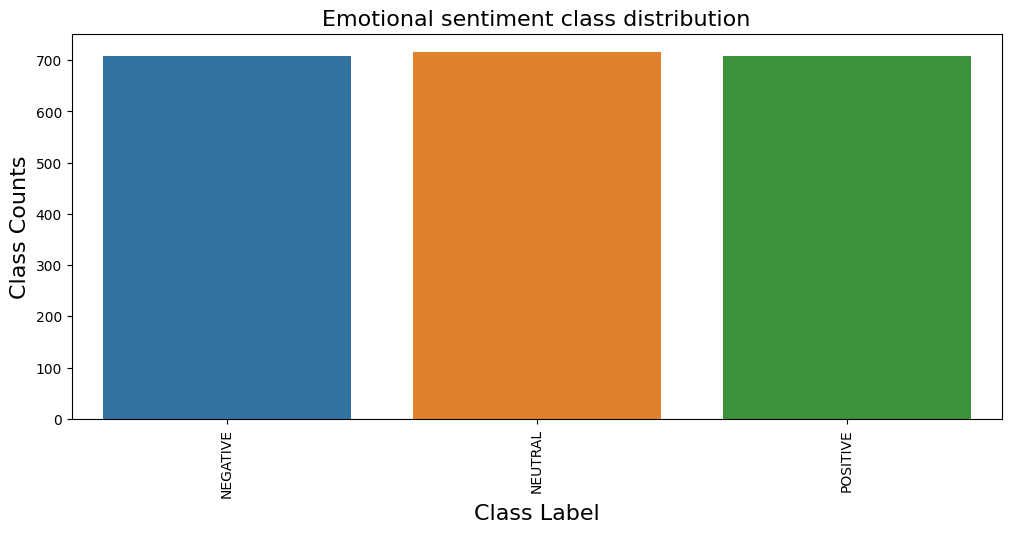

In [9]:
#Visualize the distribution of dataset
plt.figure(figsize=(12,5))
sns.countplot(x=df.label)
plt.title('Emotional sentiment class distribution', fontsize=16)
plt.ylabel('Class Counts', fontsize=16)
plt.xlabel('Class Label', fontsize=16)
plt.xticks(rotation='vertical');

In [6]:
# Drop the label column from the dataset
label_df = df['label']
df.drop('label', axis = 1, inplace=True)

## PCA

In [11]:
scaler = StandardScaler()
scaled_df = scaler.fit_transform(df)
pca = PCA(n_components = 20)
pca_vectors = pca.fit_transform(scaled_df)
for index, var in enumerate(pca.explained_variance_ratio_):
    print("Explained Variance ratio by Principal Component ", (index+1), " : ", var)

Explained Variance ratio by Principal Component  1  :  0.36772564117538736
Explained Variance ratio by Principal Component  2  :  0.09553894257232623
Explained Variance ratio by Principal Component  3  :  0.08436069000482477
Explained Variance ratio by Principal Component  4  :  0.0608566518197015
Explained Variance ratio by Principal Component  5  :  0.047453732926251616
Explained Variance ratio by Principal Component  6  :  0.03082305251847147
Explained Variance ratio by Principal Component  7  :  0.024721620860921313
Explained Variance ratio by Principal Component  8  :  0.013753055070689184
Explained Variance ratio by Principal Component  9  :  0.012408702721125686
Explained Variance ratio by Principal Component  10  :  0.012103653572015588
Explained Variance ratio by Principal Component  11  :  0.009557100572927366
Explained Variance ratio by Principal Component  12  :  0.00916431102019527
Explained Variance ratio by Principal Component  13  :  0.008740057322114627
Explained Varia

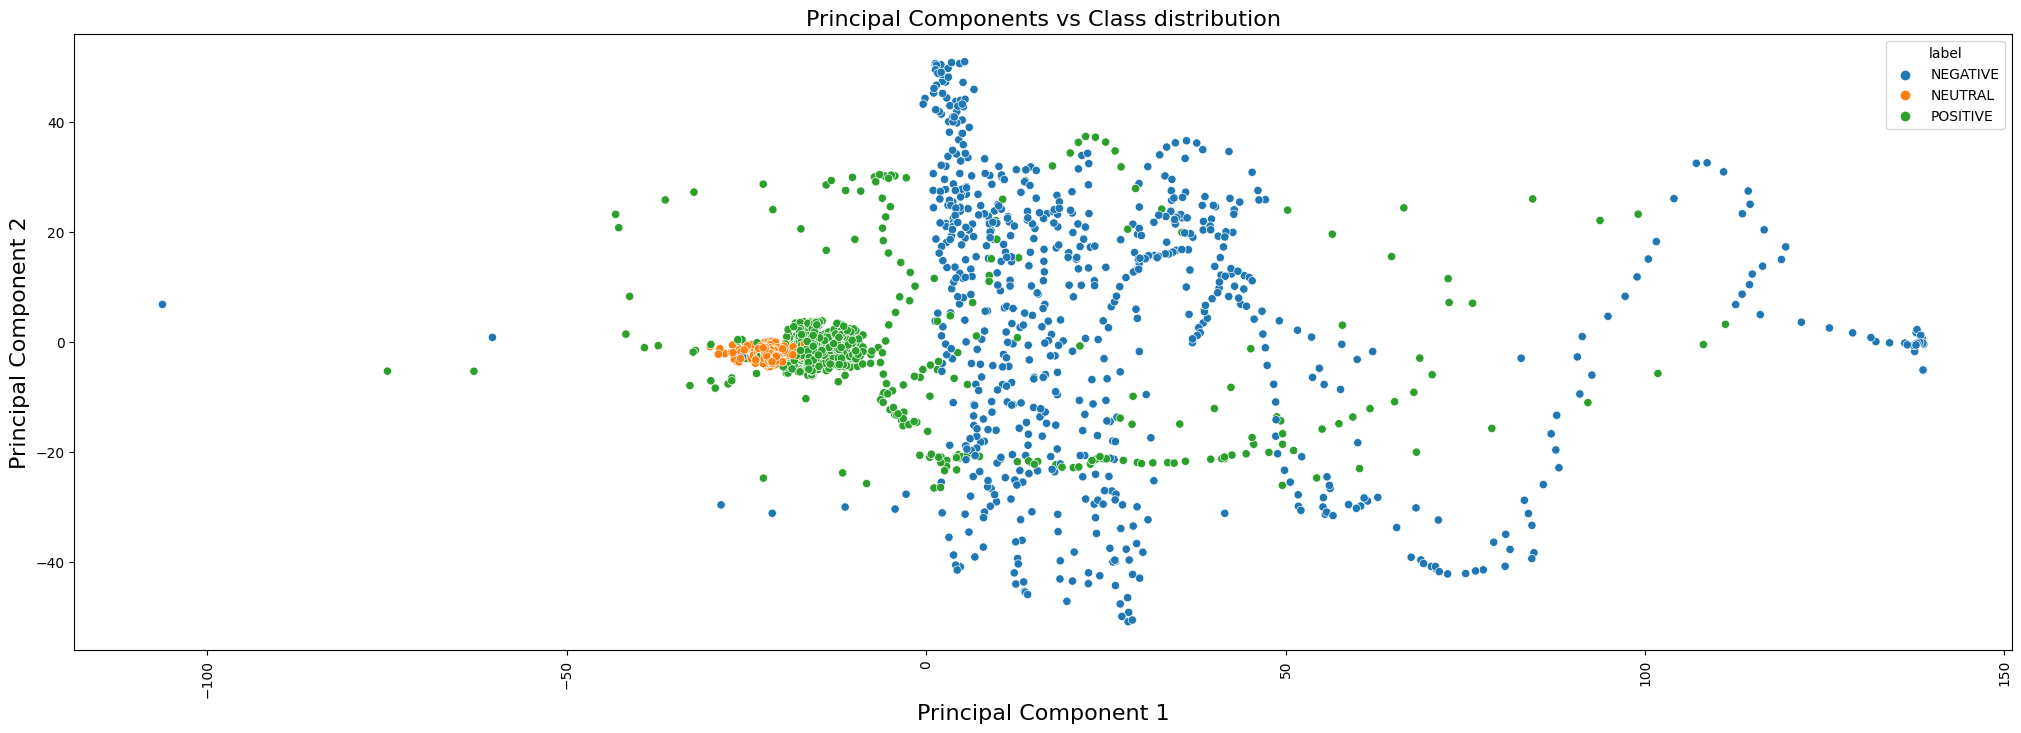

In [13]:
plt.figure(figsize=(25,8))
sns.scatterplot(x=pca_vectors[:, 0], y=pca_vectors[:, 1], hue=label_df)
plt.title('Principal Components vs Class distribution', fontsize=16)
plt.ylabel('Principal Component 2', fontsize=16)
plt.xlabel('Principal Component 1', fontsize=16)
plt.xticks(rotation='vertical');

## Logistic Regression

In [14]:
%%time
pl_log_reg_pca = Pipeline(steps=[('scaler',StandardScaler()),
                             ('pca', PCA(n_components = 2)),
                             ('log_reg', LogisticRegression(multi_class='multinomial', solver='saga', max_iter=200))])
scores = cross_val_score(pl_log_reg_pca, df, label_df, cv=10,scoring='accuracy')
print('Accuracy for Logistic Regression with 2 Principal Components: ', scores.mean())

Accuracy for Logistic Regression with 2 Principal Components:  0.7753213987977711
CPU times: user 9.48 s, sys: 5.51 s, total: 15 s
Wall time: 12.7 s


In [15]:
%%time

pl_log_reg_pca_10 = Pipeline(steps=[('scaler',StandardScaler()),
                             ('pca', PCA(n_components = 10)),
                             ('log_reg', LogisticRegression(multi_class='multinomial', solver='saga', max_iter=200))])
scores = cross_val_score(pl_log_reg_pca_10, df, label_df, cv=10,scoring='accuracy')
print('Accuracy for Logistic Regression with 10 Principal Components: ', scores.mean())

Accuracy for Logistic Regression with 10 Principal Components:  0.8663178447632836
CPU times: user 11.2 s, sys: 6.99 s, total: 18.1 s
Wall time: 15.2 s


In [16]:
%%time

pl_log_reg_pca_10 = Pipeline(steps=[('scaler',StandardScaler()),
                             ('pca', PCA(n_components = 20)),
                             ('log_reg', LogisticRegression(multi_class='multinomial', solver='saga', max_iter=200))])
scores = cross_val_score(pl_log_reg_pca_10, df, label_df, cv=10,scoring='accuracy')
print('Accuracy for Logistic Regression with 10 Principal Components: ', scores.mean())

Accuracy for Logistic Regression with 10 Principal Components:  0.8991597560440525
CPU times: user 13.8 s, sys: 8.28 s, total: 22 s
Wall time: 14.7 s


## Random Forest

In [17]:
from sklearn.ensemble import RandomForestClassifier

pl_rf_pca = Pipeline(steps=[('scaler', StandardScaler()),
                            ('pca', PCA(n_components=2)),
                            ('rf', RandomForestClassifier(n_estimators=100, max_depth=5))])

scores = cross_val_score(pl_rf_pca, df, label_df, cv=10, scoring='accuracy')
print('Accuracy for Random Forest with 2 Principal Components: ', scores.mean())

Accuracy for Random Forest with 2 Principal Components:  0.9282457987802202


In [18]:
from sklearn.ensemble import RandomForestClassifier

pl_rf_pca = Pipeline(steps=[('scaler', StandardScaler()),
                            ('pca', PCA(n_components=10)),
                            ('rf', RandomForestClassifier(n_estimators=100, max_depth=5))])

scores = cross_val_score(pl_rf_pca, df, label_df, cv=10, scoring='accuracy')
print('Accuracy for Random Forest with 2 Principal Components: ', scores.mean())

Accuracy for Random Forest with 2 Principal Components:  0.9263678645079197


In [19]:
from sklearn.ensemble import RandomForestClassifier

pl_rf_pca = Pipeline(steps=[('scaler', StandardScaler()),
                            ('pca', PCA(n_components=20)),
                            ('rf', RandomForestClassifier(n_estimators=100, max_depth=5))])

scores = cross_val_score(pl_rf_pca, df, label_df, cv=10, scoring='accuracy')
print('Accuracy for Random Forest with 2 Principal Components: ', scores.mean())

Accuracy for Random Forest with 2 Principal Components:  0.9305932166205958


## ANN

In [13]:
df = pd.read_csv('https://drive.google.com/uc?export=download&id=1pF8Pawf7bvPwK1y1_sBVkjkcTm-NDSdV')
df_fea=df.drop('label',axis=1)
y=pd.get_dummies(df['label'])
df_sc=StandardScaler().fit_transform(df_fea)
Xtr,xte,Ytr,yte=train_test_split(df_sc,y,random_state=108,test_size=0.27)
xtr,xval,ytr,yval=train_test_split(Xtr,Ytr,random_state=108,test_size=0.27)

In [14]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import callbacks,layers

model=keras.Sequential([
    layers.Dense(units=2548,input_shape=(2548,),activation='relu'), #using the relu activation because it is great for hidden layers
    layers.BatchNormalization(), #BatchNormalization layer scales the dataset even further
    layers.Dropout(0.27), #Dropping-out the nodes to make our model more general
    layers.Dense(units=3181,activation='relu'),
    layers.BatchNormalization(),
    layers.Dropout(0.3),  
    layers.Dense(units=4181,activation='relu'),
    layers.BatchNormalization(),
    layers.Dropout(0.32),  
    layers.Dense(units=2581,activation='relu'),
    layers.BatchNormalization(),
    layers.Dropout(0.27),  
    layers.Dense(units=2381,activation='relu'),
    layers.BatchNormalization(),
    layers.Dropout(0.32),  
    layers.Dense(units=2181,activation='relu'),
    layers.BatchNormalization(),
    layers.Dropout(0.27),  
    layers.Dense(units=3,activation='softmax') #Softmax activation helps in multiclass-identification
])

# Compiling the model
adam=keras.optimizers.Adam(learning_rate=0.001, beta_1=0.9, beta_2=0.999, epsilon=1e-07)
adamax=keras.optimizers.Adamax(learning_rate=0.00085, beta_1=0.9, beta_2=0.999, epsilon=1e-07) #These are just general code. you can find them easily in tensorflow API guide
#Categorical_crossentropy will make sure if all the categories are getting identified
#Accuracy will help in identifying if correct labels are getting picked-up
model.compile(optimizer=adamax,loss='categorical_crossentropy',metrics=['accuracy'])

# Fitting the model
call=callbacks.EarlyStopping(patience=10,min_delta=0.0001,restore_best_weights=True)
# Defining earlystopping callback to save time.
history=model.fit(xtr,ytr,validation_data=(xval,yval),batch_size=28,epochs=50,callbacks=[call])

Epoch 1/50
41/41 [==============================] - 6s 34ms/step - loss: 1.1578 - accuracy: 0.8229 - val_loss: 21.0598 - val_accuracy: 0.5891
Epoch 2/50
41/41 [==============================] - 1s 22ms/step - loss: 0.6610 - accuracy: 0.8634 - val_loss: 3.0512 - val_accuracy: 0.7387
Epoch 3/50
41/41 [==============================] - 1s 21ms/step - loss: 0.3876 - accuracy: 0.8872 - val_loss: 0.5683 - val_accuracy: 0.9026
Epoch 4/50
41/41 [==============================] - 1s 17ms/step - loss: 0.3681 - accuracy: 0.8943 - val_loss: 0.8760 - val_accuracy: 0.8741
Epoch 5/50
41/41 [==============================] - 1s 21ms/step - loss: 0.3105 - accuracy: 0.9004 - val_loss: 0.3762 - val_accuracy: 0.8717
Epoch 6/50
41/41 [==============================] - 1s 25ms/step - loss: 0.2153 - accuracy: 0.9286 - val_loss: 0.1647 - val_accuracy: 0.9406
Epoch 7/50
41/41 [==============================] - 1s 23ms/step - loss: 0.2719 - accuracy: 0.9207 - val_loss: 0.2265 - val_accuracy: 0.9382
Epoch 8/50
4

In [15]:
model.evaluate(xte,yte)

18/18 [==============================] - 0s 5ms/step - loss: 0.0663 - accuracy: 0.9826


[0.06627430766820908, 0.9826388955116272]

Nearly 98.3 percentage of accuracy including some dropeout layers.

## Data Pre-processing for deep learning components such as LSTM and GRU

In [7]:
# Encode the label into numerical value
le = LabelEncoder()
label_df = le.fit_transform(label_df)
print(label_df)

[0 1 2 ... 0 0 1]


In [8]:
# Split the data for test train and validation
Y = label_df.copy()
X = df.copy()
X_train, x_test, Y_train, y_test = train_test_split(X, Y,random_state=42, test_size=0.3)
X_train, x_val, Y_train, y_val=train_test_split(X_train, Y_train, random_state=42, test_size=0.3)

In [9]:
# Reshape and one-hot encode
X_train = np.array(X_train).reshape((X_train.shape[0],X_train.shape[1],1))
x_test = np.array(x_test).reshape((x_test.shape[0], x_test.shape[1],1))

Y_train = pd.get_dummies(Y_train)
y_test = pd.get_dummies(y_test)
y_val = pd.get_dummies(y_val)

## LSTM


In [12]:
i_lstm = Input(shape=(X_train.shape[1], 1))

x_lstm = LSTM(256, return_sequences=True)(i_lstm)
x_lstm = Flatten()(x_lstm)
y_lstm = Dense(3, activation='softmax')(x_lstm)

model_lstm = Model(i_lstm, y_lstm)

model_lstm.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 2548, 1)]         0         
                                                                 
 lstm (LSTM)                 (None, 2548, 256)         264192    
                                                                 
 flatten (Flatten)           (None, 652288)            0         
                                                                 
 dense (Dense)               (None, 3)                 1956867   
                                                                 
Total params: 2,221,059
Trainable params: 2,221,059
Non-trainable params: 0
_________________________________________________________________


In [13]:
adam = Adam(learning_rate=0.001)

es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=10, restore_best_weights=True)
mc = ModelCheckpoint('./best_lstm_model.h5', monitor='val_accuracy', mode='max', verbose=1, save_best_only=True)
lr_schedule = LearningRateScheduler(lambda epoch: 0.001 * np.exp(-epoch / 10.))
                                    
model_lstm.compile(optimizer=adam,
                  loss=['categorical_crossentropy'],
                  metrics=['accuracy'])
        
lstm_h = model_lstm.fit(X_train, Y_train,
                   batch_size=32,
                   validation_data=(x_val, y_val),
                   epochs=50,
                   callbacks=[es, mc, lr_schedule])

Epoch 1/50
33/33 [==============================] - ETA: 0s - loss: 9.5927 - accuracy: 0.8065
Epoch 1: val_accuracy improved from -inf to 0.83705, saving model to ./best_lstm_model.h5
33/33 [==============================] - 15s 153ms/step - loss: 9.5927 - accuracy: 0.8065 - val_loss: 3.0483 - val_accuracy: 0.8371 - lr: 0.0010
Epoch 2/50
33/33 [==============================] - ETA: 0s - loss: 1.5199 - accuracy: 0.9272
Epoch 2: val_accuracy improved from 0.83705 to 0.92411, saving model to ./best_lstm_model.h5
33/33 [==============================] - 5s 147ms/step - loss: 1.5199 - accuracy: 0.9272 - val_loss: 1.2020 - val_accuracy: 0.9241 - lr: 9.0484e-04
Epoch 3/50
33/33 [==============================] - ETA: 0s - loss: 0.4375 - accuracy: 0.9693
Epoch 3: val_accuracy did not improve from 0.92411
33/33 [==============================] - 5s 146ms/step - loss: 0.4375 - accuracy: 0.9693 - val_loss: 2.3322 - val_accuracy: 0.8594 - lr: 8.1873e-04
Epoch 4/50
33/33 [=========================

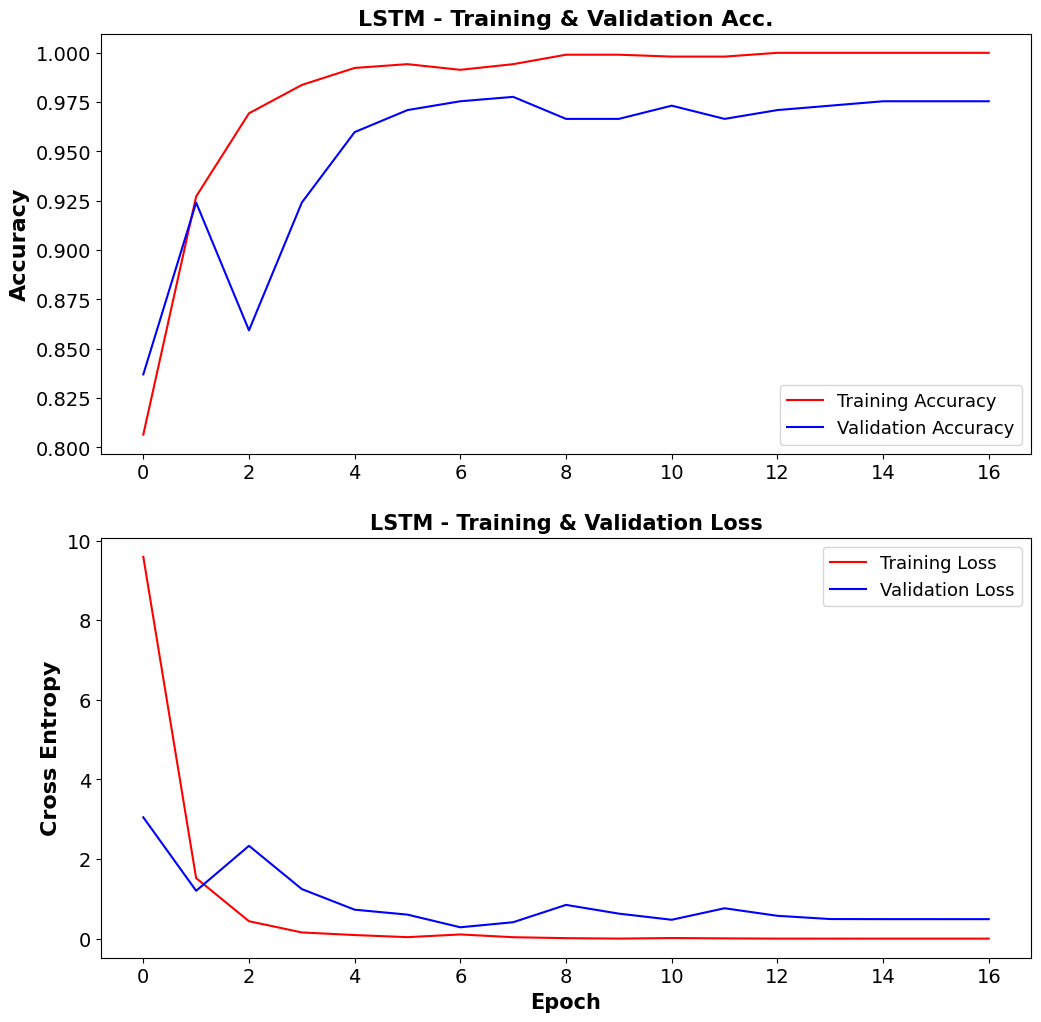

In [14]:
acc = lstm_h.history['accuracy']
val_acc = lstm_h.history['val_accuracy']

loss = lstm_h.history['loss']
val_loss = lstm_h.history['val_loss']


plt.figure(figsize=(12, 12))

plt.subplot(2, 1, 1)
plt.plot(acc, label='Training Accuracy', color='r')
plt.plot(val_acc, label='Validation Accuracy', color='b')
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.legend(loc='lower right', fontsize=13)
plt.ylabel('Accuracy', fontsize=16, weight='bold')
plt.title('LSTM - Training & Validation Acc.', fontsize=16, weight='bold')


plt.subplot(2, 1, 2)
plt.plot(loss, label='Training Loss', color='r')
plt.plot(val_loss, label='Validation Loss', color='b')
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.legend(loc='upper right', fontsize=13)
plt.ylabel('Cross Entropy', fontsize=16, weight='bold')
plt.title('LSTM - Training & Validation Loss', fontsize=15, weight='bold')
plt.xlabel('Epoch', fontsize=15, weight='bold')

plt.show()

In [15]:
lstm_best = load_model('./best_lstm_model.h5')
lstm_acc = lstm_best.evaluate(x_test, y_test, verbose=0)[1]
print("Test Acc.: {:.3f}%".format(lstm_acc * 100))

Test Acc.: 98.281%


In [16]:
y_pred = np.array(list(map(lambda x: np.argmax(x), lstm_best.predict(x_test))))
y_test = y_test.idxmax(axis=1)
cm = confusion_matrix(y_test, y_pred)
print(classification_report(y_test, y_pred))

20/20 [==============================] - 2s 54ms/step
              precision    recall  f1-score   support

           0       0.98      0.98      0.98       216
           1       1.00      0.99      1.00       215
           2       0.97      0.98      0.97       209

    accuracy                           0.98       640
   macro avg       0.98      0.98      0.98       640
weighted avg       0.98      0.98      0.98       640



Normalized confusion matrix


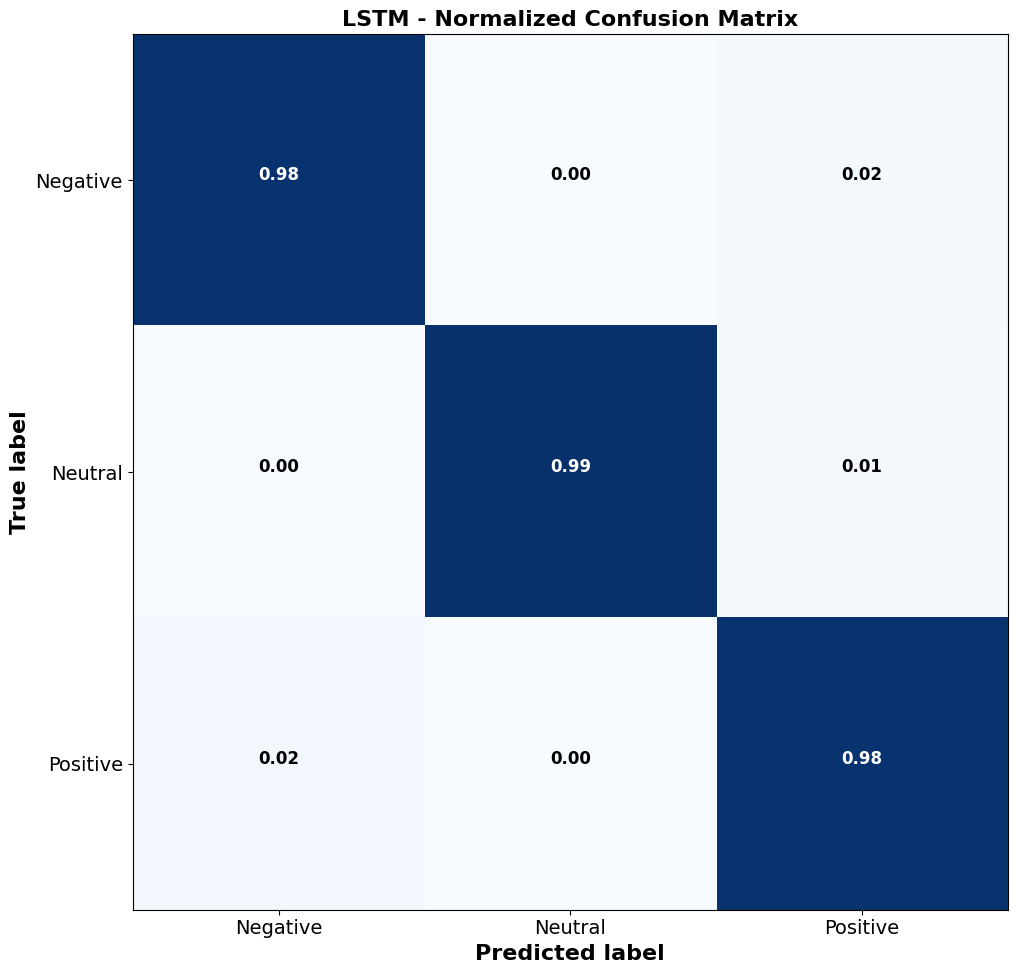

In [17]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title, weight='bold', fontsize=16)
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, fontsize=14)
    plt.yticks(tick_marks, classes, fontsize=14)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center", fontsize=12, weight='bold',
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label', fontsize=16, weight='bold')
    plt.xlabel('Predicted label', fontsize=16, weight='bold')

cnf_matrix = cm
np.set_printoptions(precision=2)

plt.figure(figsize=(10, 10))
plot_confusion_matrix(cnf_matrix, classes=['Negative', 'Neutral', 'Positive'], normalize=True,
                      title='LSTM - Normalized Confusion Matrix')
plt.show()

## GRU Models

In [ ]:
Y = label_df.copy()
X = df.copy()
X_train, x_test, Y_train, y_test = train_test_split(X, Y,random_state=42, test_size=0.3)
X_train, x_val, Y_train, y_val=train_test_split(X_train, Y_train, random_state=42, test_size=0.3)

In [ ]:
X_train = np.array(X_train).reshape((X_train.shape[0],X_train.shape[1],1))
x_test = np.array(x_test).reshape((x_test.shape[0], x_test.shape[1],1))

Y_train = pd.get_dummies(Y_train)
y_test = pd.get_dummies(y_test)
y_val = pd.get_dummies(y_val)

In [28]:
i_gru = Input(shape=(X_train.shape[1], 1))

x_gru = GRU(256, return_sequences=True)(i_gru)
x_gru = Flatten()(x_gru)
y_gru = Dense(3, activation='softmax')(x_gru)

model_gru = Model(i_gru, y_gru)

model_gru.summary()

Model: "model_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_3 (InputLayer)        [(None, 2548, 1)]         0         
                                                                 
 gru_1 (GRU)                 (None, 2548, 256)         198912    
                                                                 
 flatten_2 (Flatten)         (None, 652288)            0         
                                                                 
 dense_2 (Dense)             (None, 3)                 1956867   
                                                                 
Total params: 2,155,779
Trainable params: 2,155,779
Non-trainable params: 0
_________________________________________________________________


In [29]:
adam = Adam(learning_rate=0.001)

es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=10, restore_best_weights=True)
mc = ModelCheckpoint('./best_gru_model.h5', monitor='val_accuracy', mode='max', verbose=1, save_best_only=True)
lr_schedule = LearningRateScheduler(lambda epoch: 0.001 * np.exp(-epoch / 10.))
                                    
model_gru.compile(optimizer=adam,
                  loss=['categorical_crossentropy'],
                  metrics=['accuracy'])
        
gru_h = model_gru.fit(X_train, Y_train,
                   batch_size=32,
                   validation_data=(x_val, y_val),
                   epochs=50,
                   callbacks=[es, mc, lr_schedule])

Epoch 1/50
33/33 [==============================] - ETA: 0s - loss: 42.5377 - accuracy: 0.7529
Epoch 1: val_accuracy improved from -inf to 0.91295, saving model to ./best_gru_model.h5
33/33 [==============================] - 6s 135ms/step - loss: 42.5377 - accuracy: 0.7529 - val_loss: 10.3303 - val_accuracy: 0.9129 - lr: 0.0010
Epoch 2/50
33/33 [==============================] - ETA: 0s - loss: 9.8758 - accuracy: 0.8822 
Epoch 2: val_accuracy improved from 0.91295 to 0.92411, saving model to ./best_gru_model.h5
33/33 [==============================] - 4s 126ms/step - loss: 9.8758 - accuracy: 0.8822 - val_loss: 9.0541 - val_accuracy: 0.9241 - lr: 9.0484e-04
Epoch 3/50
33/33 [==============================] - ETA: 0s - loss: 5.4460 - accuracy: 0.9291
Epoch 3: val_accuracy did not improve from 0.92411
33/33 [==============================] - 4s 121ms/step - loss: 5.4460 - accuracy: 0.9291 - val_loss: 10.4030 - val_accuracy: 0.8170 - lr: 8.1873e-04
Epoch 4/50
33/33 [=======================

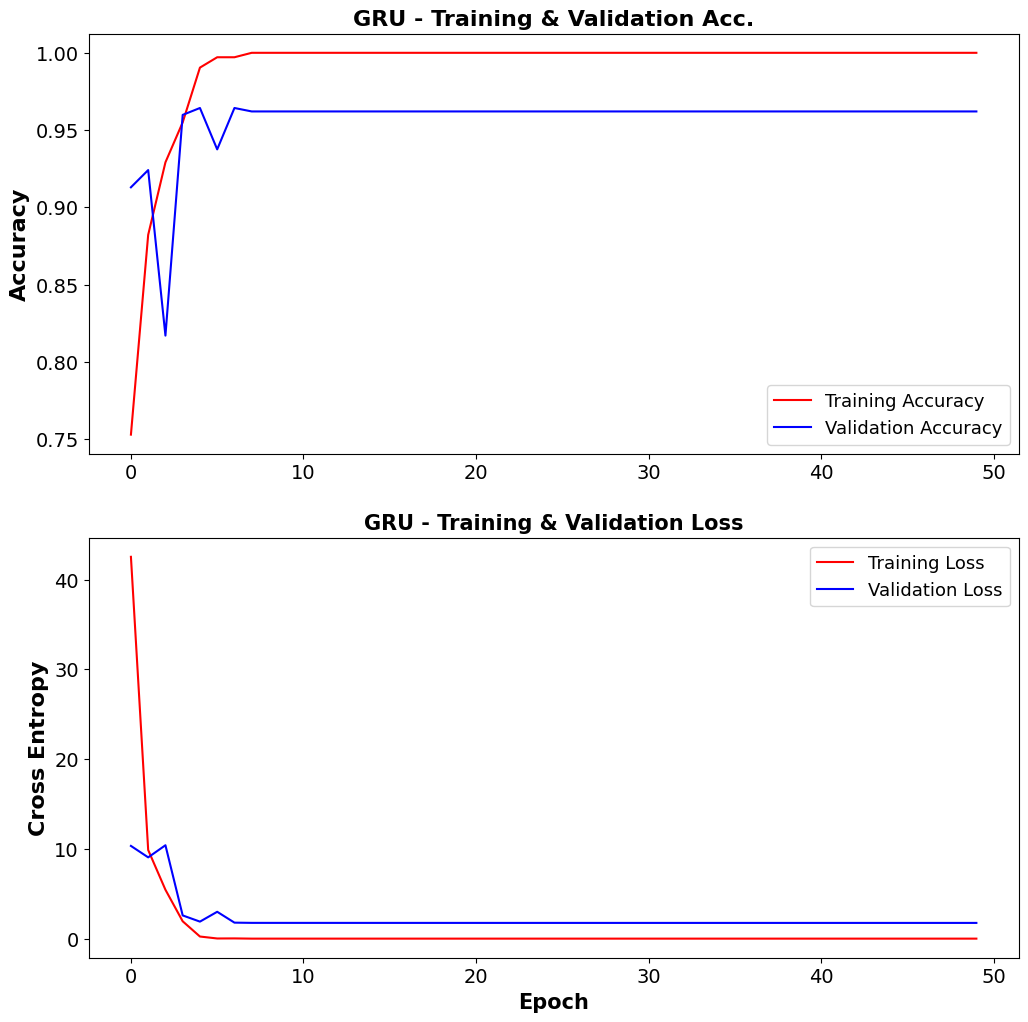

In [30]:
# Show History
acc = gru_h.history['accuracy']
val_acc = gru_h.history['val_accuracy']

loss = gru_h.history['loss']
val_loss = gru_h.history['val_loss']


plt.figure(figsize=(12, 12))

plt.subplot(2, 1, 1)
plt.plot(acc, label='Training Accuracy', color='r')
plt.plot(val_acc, label='Validation Accuracy', color='b')
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.legend(loc='lower right', fontsize=13)
plt.ylabel('Accuracy', fontsize=16, weight='bold')
plt.title('GRU - Training & Validation Acc.', fontsize=16, weight='bold')


plt.subplot(2, 1, 2)
plt.plot(loss, label='Training Loss', color='r')
plt.plot(val_loss, label='Validation Loss', color='b')
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.legend(loc='upper right', fontsize=13)
plt.ylabel('Cross Entropy', fontsize=16, weight='bold')
plt.title('GRU - Training & Validation Loss', fontsize=15, weight='bold')
plt.xlabel('Epoch', fontsize=15, weight='bold')

plt.show()

In [31]:
gru_best = load_model('./best_gru_model.h5')
gru_acc = gru_best.evaluate(x_test, y_test, verbose=0)[1]
print("Test Acc. GRU: {:.3f}%".format(gru_acc * 100))

Test Acc. GRU: 96.094%


In [32]:
y_pred = np.array(list(map(lambda x: np.argmax(x), gru_best.predict(x_test))))
y_test = y_test.idxmax(axis=1)
cm = confusion_matrix(y_test, y_pred)
print(classification_report(y_test, y_pred))

20/20 [==============================] - 1s 48ms/step
              precision    recall  f1-score   support

           0       0.97      0.94      0.96       216
           1       1.00      0.98      0.99       215
           2       0.92      0.96      0.94       209

    accuracy                           0.96       640
   macro avg       0.96      0.96      0.96       640
weighted avg       0.96      0.96      0.96       640



Normalized confusion matrix


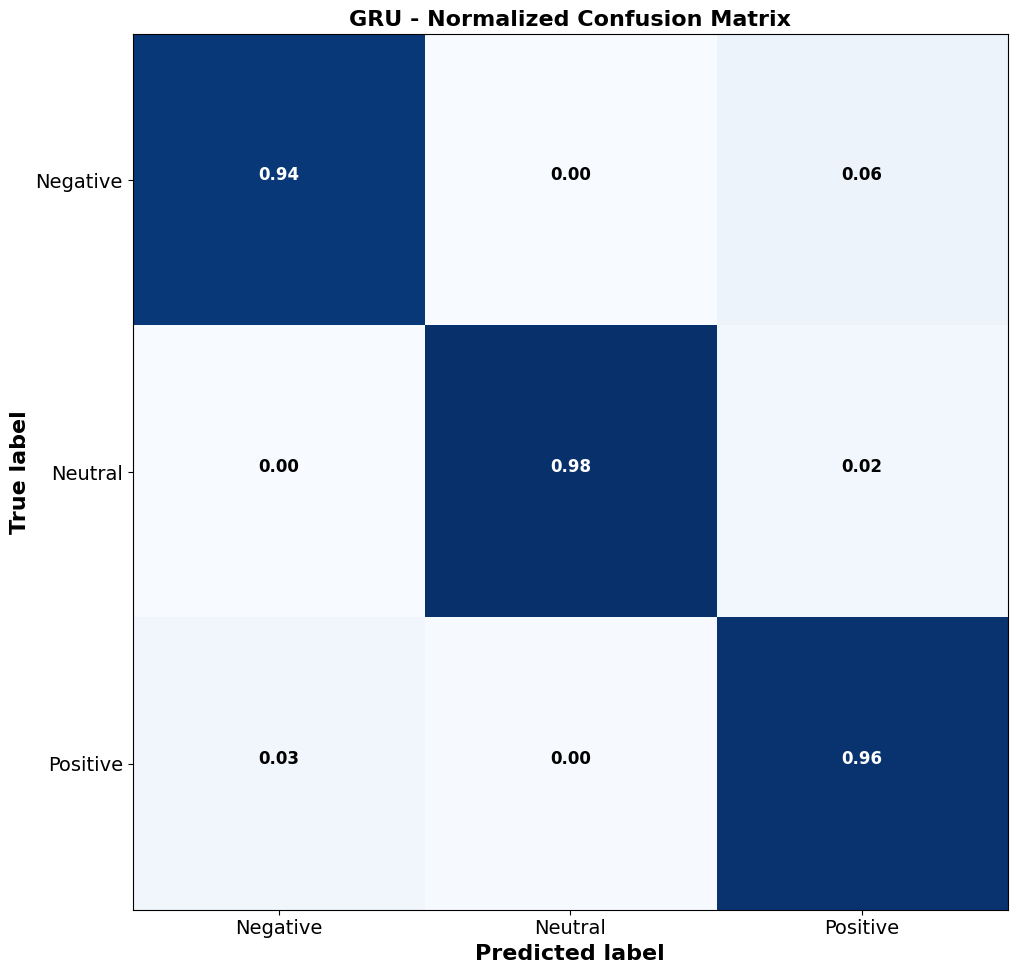

In [33]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title, weight='bold', fontsize=16)
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, fontsize=14)
    plt.yticks(tick_marks, classes, fontsize=14)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center", fontsize=12, weight='bold',
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label', fontsize=16, weight='bold')
    plt.xlabel('Predicted label', fontsize=16, weight='bold')

cnf_matrix = cm
np.set_printoptions(precision=2)

plt.figure(figsize=(10, 10))
plot_confusion_matrix(cnf_matrix, classes=['Negative', 'Neutral', 'Positive'], normalize=True,
                      title='GRU - Normalized Confusion Matrix')
plt.show()